In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs  
from matplotlib import pyplot as plt 

In [2]:
clusters = [[6,6,6], [2,2,2], [3,9,9]]
X, y = make_blobs(centers = clusters, cluster_std = 0.70)

- Mean Shift
    - Algoritmo de aprendizaje no supervisado y no paramétrico (no requiere especificar el número de clusters)
    - Se utiliza principalmente para la agrupación
    - Cada punto se desplaza a la media regional paso a paso
        - El primer paso y el más crucial es definir un radio de búsqueda, llamado bandwidth (ancho de banda). Este radio determina qué puntos vecinos serán considerados en el cálculo de cada movimiento.
        - Para cada punto de datos:
            - Se dibuja una "ventana" (un círculo o esfera) con el radio definido (bandwidth), centrada en ese punto.
            - Se identifican todos los puntos que caen dentro de esa ventana.
            - Se calcula la media (el centroide) de esos puntos vecinos.
            - El vector de desplazamiento es la flecha que va desde el punto original hasta la nueva media calculada
            - El punto original se mueve a lo largo de ese vector de desplazamiento, acercándose a la región donde hay más densidad de puntos (hacia la "media")  
        - Repetir hasta la Convergencia 
        - Todos los puntos que han convergido a la misma ubicación final se consideran parte del mismo clúster.
    - La ubicación del destino final de cada punto representa el grupo al que pertence
    - Es un algoritmo computacionalmente costoso

- Desafío: Encontrar los clusters y graficarlos en 3D
    1. Usar los datos generados por medio de make_blobs para entrenar el modelo de MeanShift
        - La función make_blobs de la librería scikit-learn es una utilidad muy popular para generar conjuntos de datos sintéticos artificiales que simulan datos del mundo real.
        - Su parámetro:
            - n_features toma valor 2 por defecto, indicando que se manejan 2 características por cada punto.
            - n_samples toma valor 100 por defecto, indicando que se manejan 100 puntos.
            - cluster_std controla la desviación estándar (dispersión o variabilidad) de los puntos de datos generados dentro de cada clúster.
        - En el código antecedente:
            - X contiene las coordenadas: [[x1, y1], [x2, y2], ...]
            - y contiene las etiquetas de cluster: [0, 2, 0, 2, 2, 1, ...]
    2. Obtener las coordenadas de los clusters
    3. Trazar los puntos de datos y los centroides en un gráfico de la clase pyplot de matplotlib

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [4]:
y

array([0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1])

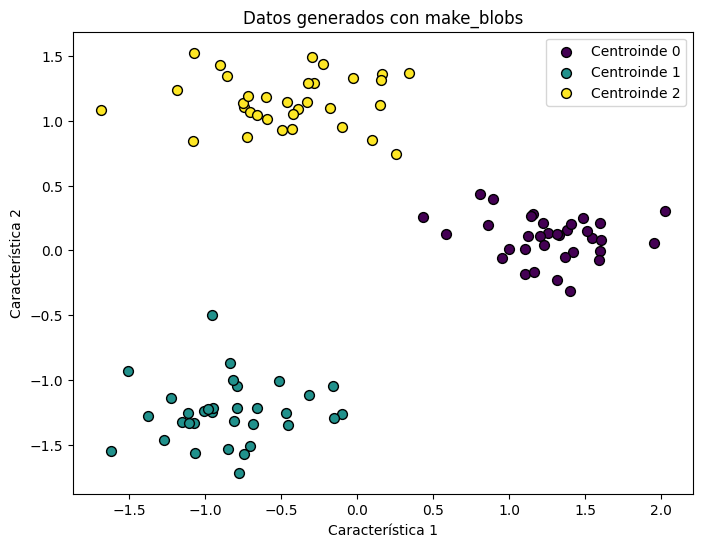

In [5]:
import numpy as np

plt.figure(figsize=(8, 6))  
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

for i, color in zip(range(len(clusters)), colors):    
    puntos_cluster = X[y == i]
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], 
                color=color, 
                label=f'Centroinde {i}', 
                marker='o', 
                edgecolor='k', 
                s=50)
    
plt.legend()
plt.title("Datos generados con make_blobs")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [6]:
import numpy as np

# quantile determina qué porcentaje de los datos se encuentra dentro del radio estimado para cada punto
# El valor óptimo para quantile a menudo depende directamente del valor de cluster_std utilizado para generar los datos.
# Si generas datos con un cluster_std BAJO (clústeres compactos), necesitarás un valor de quantile proporcionalmente BAJO (ej. 0.1 o 0.2) para que el algoritmo Mean Shift no fusione los clústeres compactos por error.
# Si generas datos con un cluster_std ALTO (clústeres difusos), necesitarás un valor de quantile proporcionalmente ALTO (ej. 0.4 o 0.5) para capturar la dispersión natural de cada grupo.

# n_samples controla cuántos puntos se muestrean aleatoriamente del conjunto de datos completo para estimar el ancho de banda.
# Si tus datos son muy grandes (ej. 100,000 puntos generados con make_blobs), calcular la distancia entre todos los pares de puntos para estimar el ancho de banda es computacionalmente costoso y lento. 
# En este caso, usas un n_samples más pequeño en estimate_bandwidth (ej. 500 o 1000) para acelerar el cálculo.

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# bandwidth determina el alcance con el que cada punto de datos "mira a su alrededor" para encontrar la dirección de mayor densidad de puntos (la "media").
# bin_seeding = True divide el espacio de datos en una cuadrícula tridimensional (bins). En lugar de comenzar la búsqueda desde cada punto individual, inicia una búsqueda desde el centro de cada "bin" (caja de la cuadrícula) que contiene datos.
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_             # Etiquetas de clúster asignadas a cada punto
cluster_centers = ms.cluster_centers_ # Coordenadas de los centros encontrados
num_clusters = len(np.unique(labels)) # Contar el número de clústeres únicos

In [7]:
labels

array([0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2])

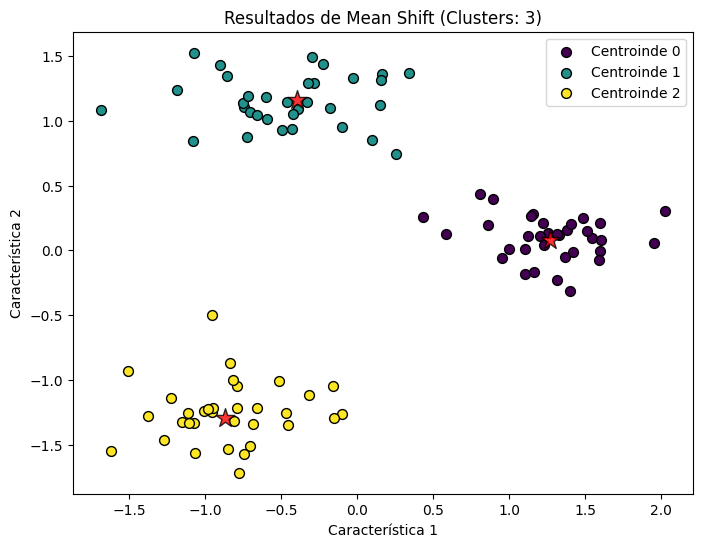

In [8]:
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

# Graficar los puntos de datos, coloreados por su etiqueta de clúster
for i, color in zip(range(num_clusters), colors):    
    puntos_cluster = X[labels == i]
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], 
                color=color, 
                label=f'Centroinde {i}', 
                marker='o', 
                edgecolor='k', 
                s=50)
    
# Graficar los centros de los clústeres encontrados
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.8, marker='*', edgecolor='k', zorder=2)
plt.legend()
plt.title(f"Resultados de Mean Shift (Clusters: {num_clusters})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()